<a href="https://colab.research.google.com/github/pranjalikathait/ML_heathcare/blob/main/healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
#Reading first five rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **Checking for inconsistencies in the data**

In [ ]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [ ]:
#converting datatatype of 'age' from float to int
df['age']= df['age'].astype('int')

In [ ]:
df['age'].unique()

array([67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 50, 64, 75, 60, 57, 71,
       52, 82, 65, 58, 42, 48, 72, 63, 76, 39, 77, 73, 56, 45, 70, 66, 51,
       43, 68, 47, 53, 38, 55,  1, 46, 32, 14,  3,  8, 37, 40, 35, 20, 44,
       25, 27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 34, 36,
        0, 41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10, 19,  6])

In [ ]:
#converting 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' to category
cols= ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
df[cols]= df[cols].astype('category')

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Rechecking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   int64   
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 305.3 KB


In [ ]:
#Dropping the 'id' column because it is not useful
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Exploratory Data Analysis**

In [ ]:
num_rows, num_columns= df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 5110 rows and 11 columns.


In [ ]:
#checking for unique value in each of the columns
df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
#Checking for duplicacy in the dataset
num_duplicates=df.duplicated().sum()
print("Total number of duplicate rows :",num_duplicates)

Total number of duplicate rows : 0


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Statistical Inferences:**

*   Median age of population is 43 years.
*   25% of the population is aged below 25
*   Another 25% of the population is aged above 60 and remaining in between these ages
*   Average glucose level of the population is 106
*   About 9.7% and 5.4% of the population suffers from hypertension and heart disease repectively
*   People with higher BMI (BMI>45) are less represented. This can affect our model significantly.







In [ ]:
#Creating a copy of the dataset
df_copy=df.copy()

In [ ]:
#Changing values 0 and 1 with their respective terms, so to not have any sort of confusion
df_copy['hypertension']= np.where(df_copy['hypertension']==1, 'Hypertension' , 'No Hypertension')
df_copy['heart_disease']= np.where(df_copy['heart_disease']==1, 'Heart disease', 'No heart disease')
df_copy['stroke']= np.where(df_copy['stroke']==1 , 'Heart stroke', 'No Stroke')
df_copy['ever_married']= np.where(df_copy['ever_married']=='Yes' , 'Ever married', 'Never married')

In [ ]:
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No Hypertension,Heart disease,Ever married,Private,Urban,228.69,36.6,formerly smoked,Heart stroke
1,Female,61,No Hypertension,No heart disease,Ever married,Self-employed,Rural,202.21,NaN,never smoked,Heart stroke
2,Male,80,No Hypertension,Heart disease,Ever married,Private,Rural,105.92,32.5,never smoked,Heart stroke
3,Female,49,No Hypertension,No heart disease,Ever married,Private,Urban,171.23,34.4,smokes,Heart stroke
4,Female,79,Hypertension,No heart disease,Ever married,Self-employed,Rural,174.12,24.0,never smoked,Heart stroke


In [ ]:
print("Percentage of population which has 35 < BMI < 45 :{:0.2f}%".format(df[(df['bmi']<45) & (df['bmi']>35)].shape[0]*100/df.shape[0]))
print("Percentage of population which has 45 < BMI < 60 :{:0.2f}%".format(df[(df['bmi']<60) & (df['bmi']>45)].shape[0]*100/df.shape[0]))


Percentage of population which has 35 < BMI < 45 :14.64%
Percentage of population which has 45 < BMI < 60 :2.78%


## **Univariate Analysis**

### **Categorical Features:**

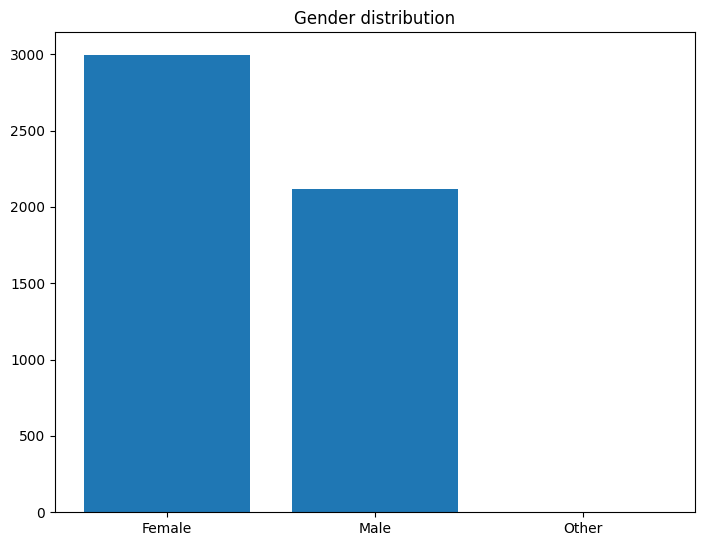

Percentage of females : 58.590998043052835
Percentage of males : 41.3894324853229
Percentage of others : 0.019569471624266144


In [ ]:
fig= plt.figure()
ax= fig.add_axes([0,0,1,1])
gender= ['Female','Male','Other']
x= df['gender'].value_counts()['Female']
y= df['gender'].value_counts()['Male']
z= df['gender'].value_counts()['Other']
counts= [x,y,z]
ax.bar(gender,counts)
plt.title('Gender distribution')
plt.show()

print("Percentage of females :", x*100/(x+y+z))
print("Percentage of males :", y*100/(x+y+z))
print("Percentage of others :", z*100/(x+y+z))

*   There are more female patients than male patients.
*   There are hardly no patients in the other category, therefore it's best to drop it.



In [ ]:
df2= pd.DataFrame.copy(df)
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
df2['age-group']= pd.cut(df['age'],bins=bins,labels=labels)

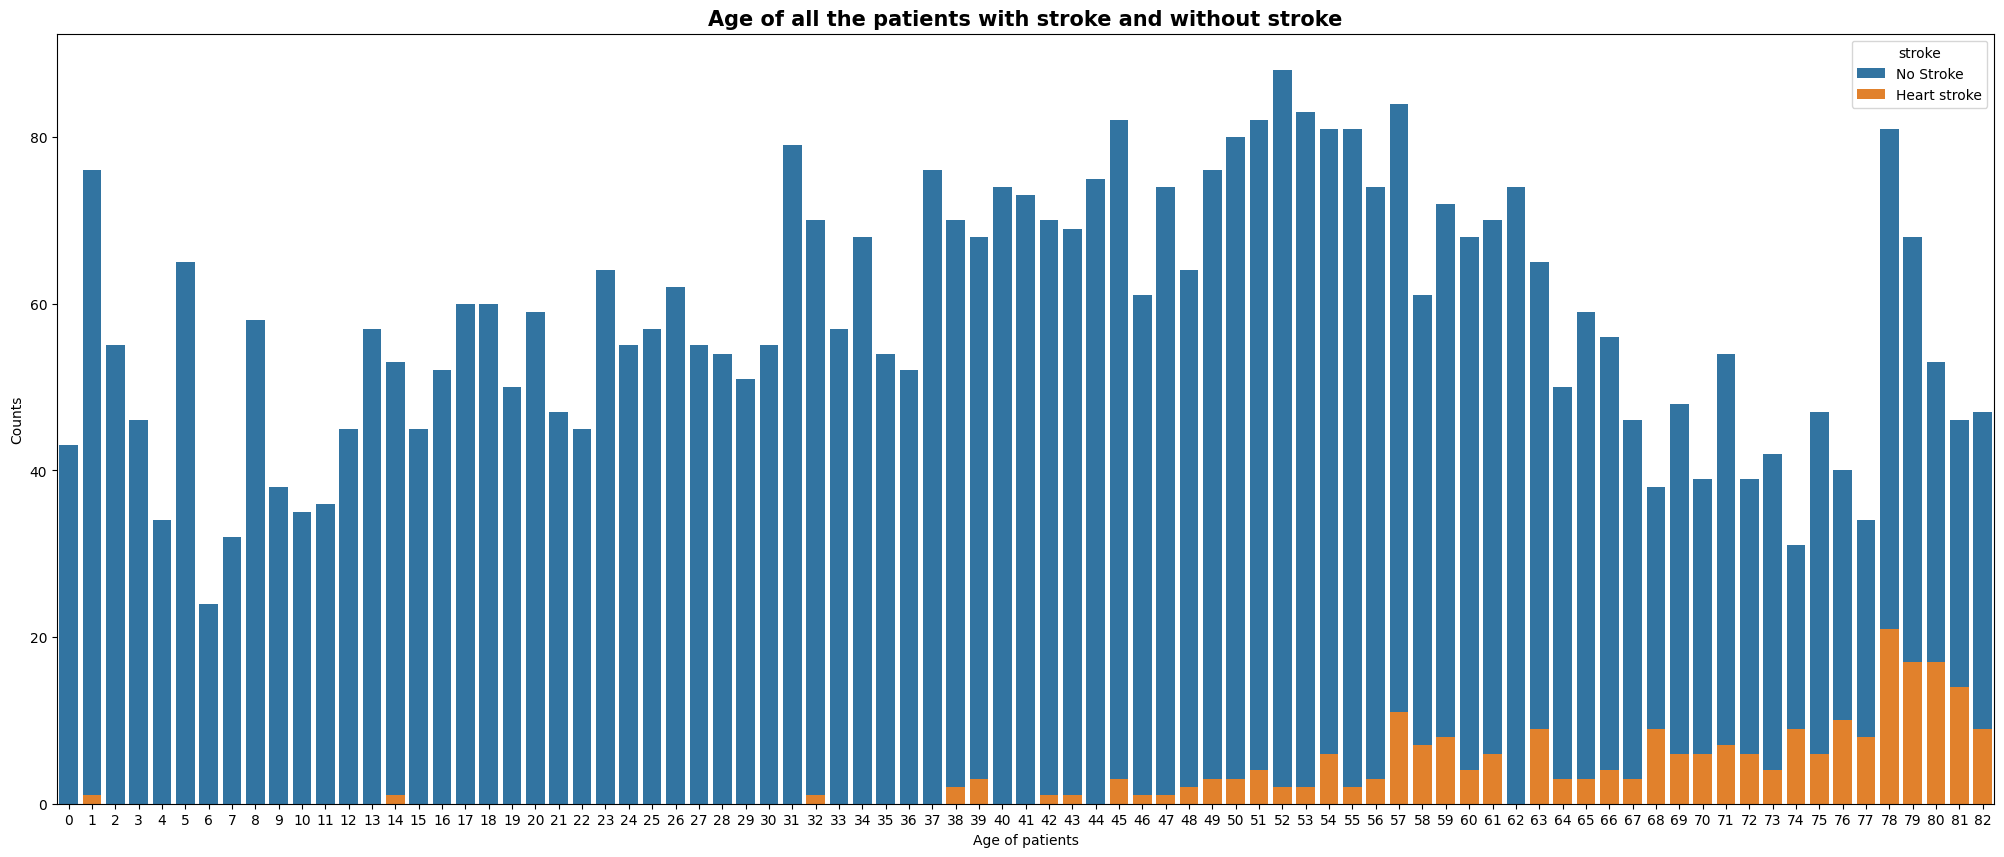

In [ ]:
plt.figure(figsize=[25,10])
sns.countplot(data=df_copy.sort_values('age'),x='age',hue='stroke',dodge=False)
plt.title("Age of all the patients with stroke and without stroke",fontsize=15,fontweight='bold')
plt.xlabel("Age of patients")
plt.ylabel("Counts")
plt.show()

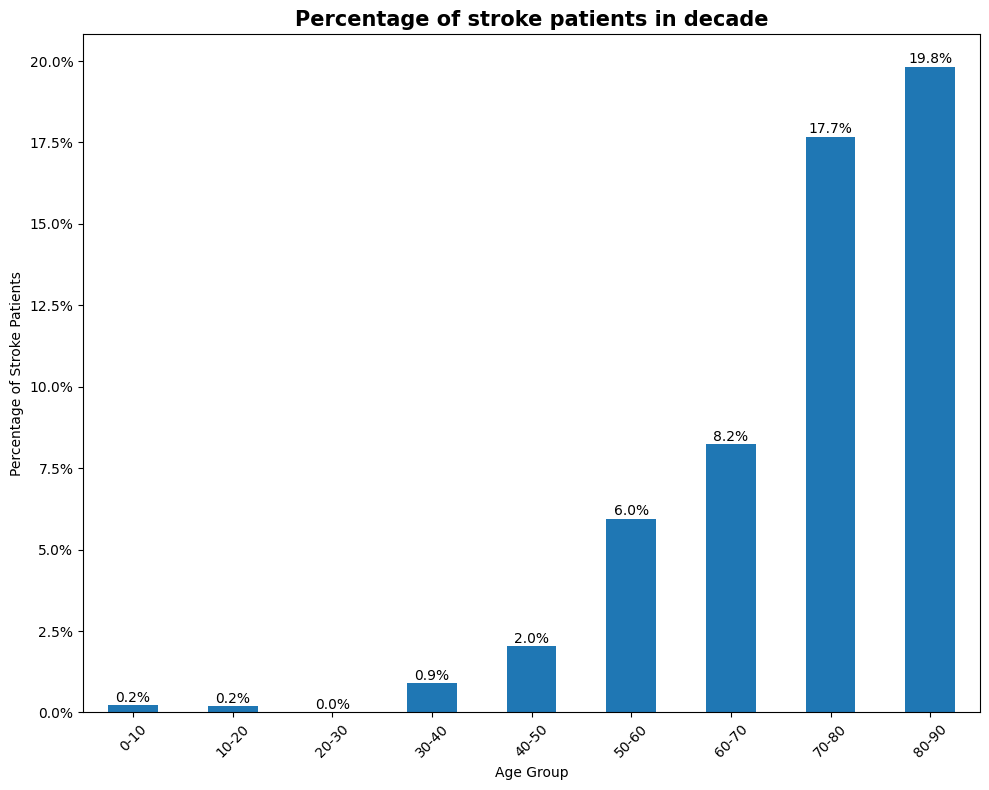

In [ ]:
import matplotlib.ticker as mtick

percentage_stroke_by_age_group = 100 * df2[df2['stroke'] == 1]['age-group'].value_counts() / df2['age-group'].value_counts()

plt.figure(figsize=[10,8])
percentage_stroke_by_age_group.plot(kind='bar')

plt.title("Percentage of stroke patients in decade", fontsize=15, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Percentage of Stroke Patients")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)

for n, value in enumerate(percentage_stroke_by_age_group):
    plt.text(n, value+0.1, '{:.1f}%'.format(value), ha='center')

plt.tight_layout()
plt.show()


*   The age distribution shows that age data is clearly skewed slightly towards left.
*   Greater number of patients from older age group



**BMI categories is divided into four categories:**

*  **Under weight** : BMI < 18.5
*  **Normal weight** : 18.5 < BMI < 25
*  **Over_weight** : 25 < BMI < 30
*  **Obese** : BMI > 30





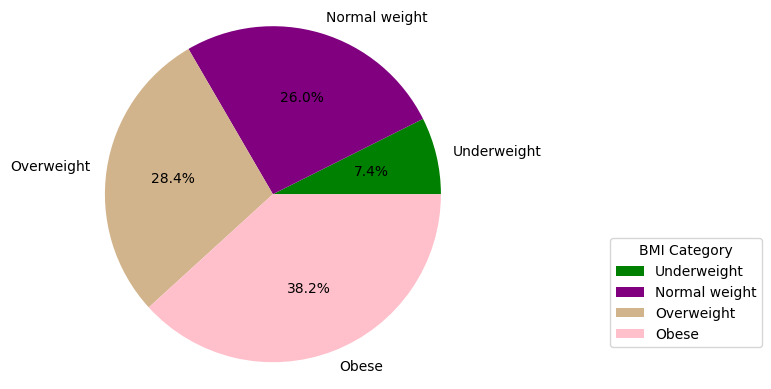

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[df_copy[df_copy['bmi'] <= 18.5]['stroke'].value_counts()[0],
           df_copy[(df_copy['bmi'] <= 25) & (df_copy['bmi'] > 18.5)]['stroke'].value_counts()[0],
           df_copy[(df_copy['bmi'] <= 30) & (df_copy['bmi'] > 25)]['stroke'].value_counts()[0],
           df_copy[(df_copy['bmi'] > 30)]['stroke'].value_counts()[0]],
        labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'],
        pctdistance=0.6, radius=6, autopct='%1.1f%%',
        colors=['green', 'purple', 'tan', 'pink'])

ax1.axis('equal')
plt.legend(title="BMI Category", loc=1, bbox_to_anchor=(1.5, 0.4))
plt.show()

<Figure size 2500x1200 with 0 Axes>

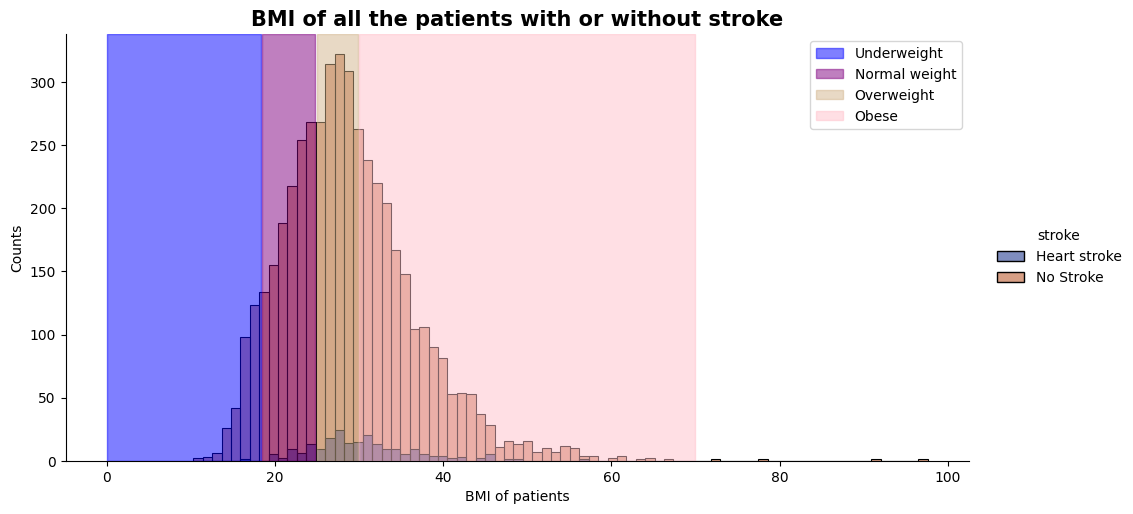

In [ ]:
plt.figure(figsize=[25,12])
sns.displot(data=df_copy,x='bmi',hue='stroke',aspect=2,palette='dark')
plt.title("BMI of all the patients with or without stroke",fontsize=15,fontweight='bold')
plt.axvspan(0,18.4,color='blue',alpha=0.5)
plt.axvspan(18.5,24.8,color='purple',alpha=0.5)
plt.axvspan(25,29.9,color='tan',alpha=0.5)
plt.axvspan(30,70,color='pink',alpha=0.5)

plt.xlabel("BMI of patients")
plt.ylabel("Counts")
plt.legend(labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

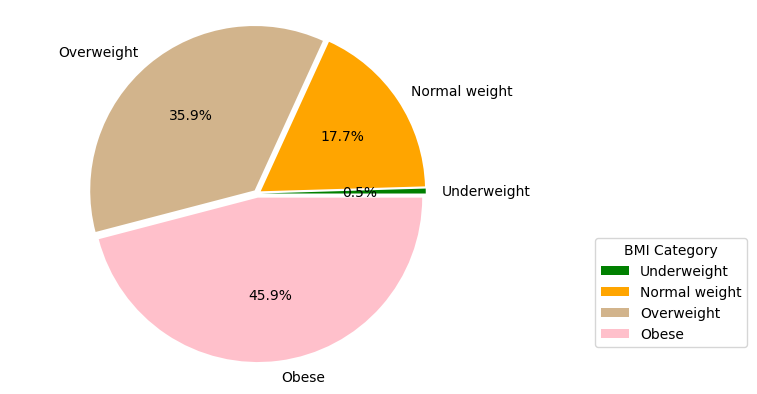

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[df_copy[df_copy['bmi'] <= 18.5]['stroke'].value_counts()[1],
           df_copy[(df_copy['bmi'] <= 25) & (df_copy['bmi'] > 18.5)]['stroke'].value_counts()[1],
           df_copy[(df_copy['bmi'] <= 30) & (df_copy['bmi'] > 25)]['stroke'].value_counts()[1],
           df_copy[(df_copy['bmi'] > 30)]['stroke'].value_counts()[1]],
        labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'],
        pctdistance=0.6, radius=6, explode=[0.15,0.15,0.15,0.15],autopct='%1.1f%%',
        colors=['green', 'orange', 'tan', 'pink'])

ax1.axis('equal')
plt.legend(title="BMI Category", loc=1, bbox_to_anchor=(1.5, 0.4))
plt.show()

*   Stroke depends on BMI.
*   Most of the stroke patients are overweight or obese.



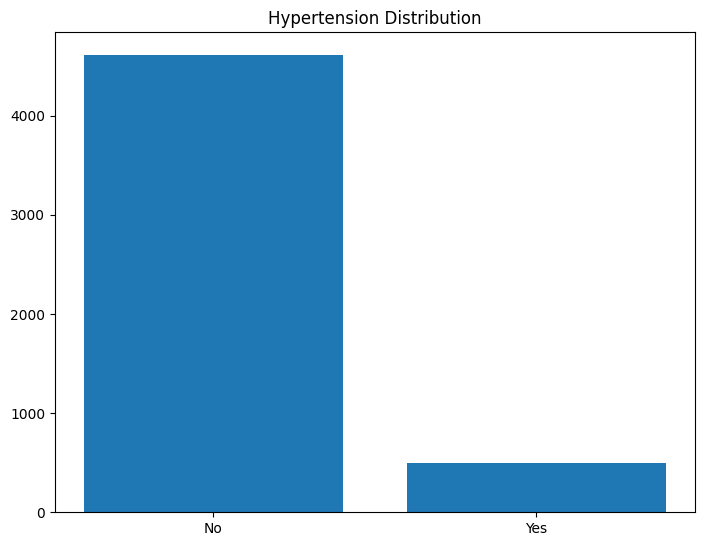

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
values=['No','Yes']
x=df['hypertension'].value_counts()[0]
y=df['hypertension'].value_counts()[1]
counts=[x,y]
ax.bar(values,counts)
plt.title("Hypertension Distribution")
plt.show()

The number of patients with hypertension is lower.

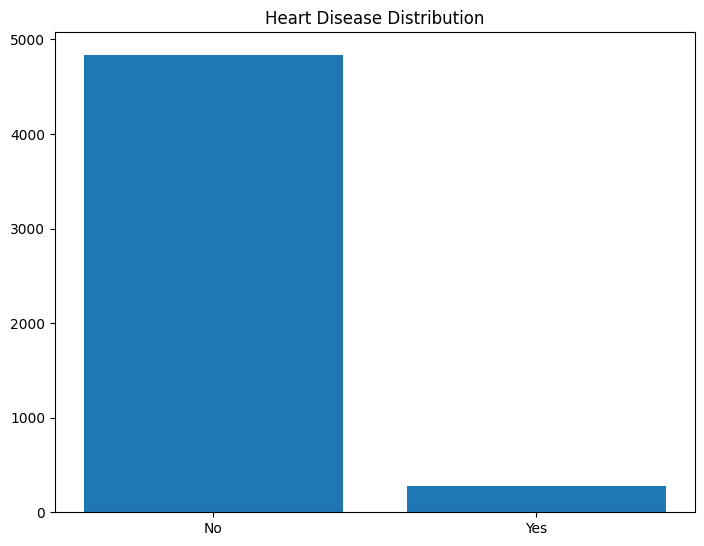

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
values=['No','Yes']
x=df['heart_disease'].value_counts()[0]
y=df['heart_disease'].value_counts()[1]
counts=[x,y]
ax.bar(values,counts)
plt.title("Heart Disease Distribution")
plt.show()

This dataset has more patients without heart disease

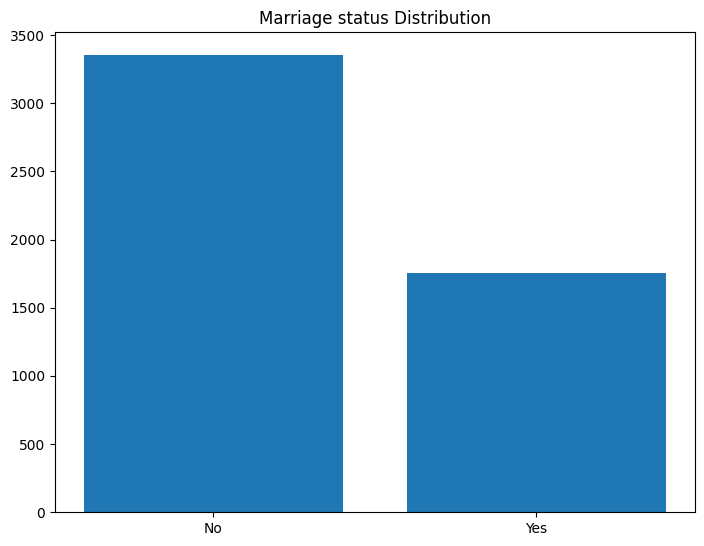

Amount of patients who have been married : 1757
Amount of patients who have never been married : 3353


In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
x=df['ever_married'].value_counts()[0]
y=df['ever_married'].value_counts()[1]
counts=[x,y]
ax.bar(values,counts)
plt.title("Marriage status Distribution")
plt.show()

print("Amount of patients who have been married :",y)
print("Amount of patients who have never been married :",x)

Private : 2925
Self employed : 819
Government job : 657
Children : 687
Never worked : 22


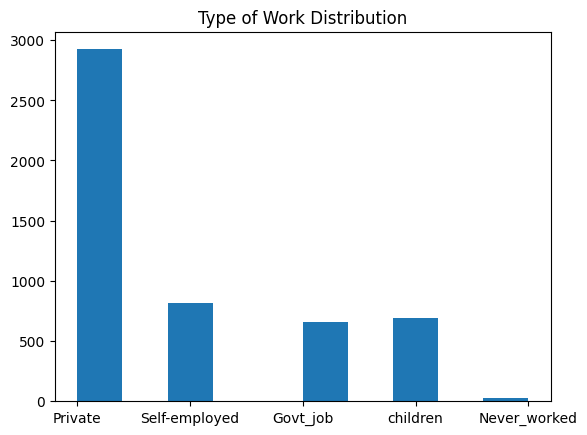

In [ ]:
plt.hist(df['work_type'])
plt.title("Type of Work Distribution")

private=df['work_type'].value_counts()['Private']
self_employed=df['work_type'].value_counts()['Self-employed']
govt_job=df['work_type'].value_counts()['Govt_job']
children=df['work_type'].value_counts()['children']
never_worked=df['work_type'].value_counts()['Never_worked']

print("Private :",private)
print("Self employed :",self_employed)
print("Government job :",govt_job)
print("Children :",children)
print("Never worked :",never_worked)

*   The majority of stroke victims are employed in the private sector.
*   People who have never worked are mostly not stroke victims.



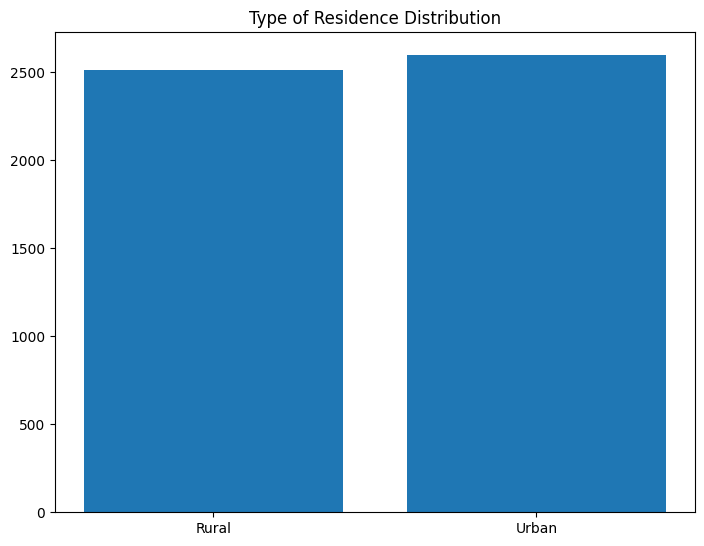

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
values=['Rural','Urban']
x=df['Residence_type'].value_counts()['Rural']
y=df['Residence_type'].value_counts()['Urban']
counts=[x,y]
ax.bar(values,counts)
plt.title("Type of Residence Distribution")
plt.show()

The number of patients in rural areas appears to be fairly equal to those in urban areas.

Text(0.5, 1.0, 'Smoking status distribution')

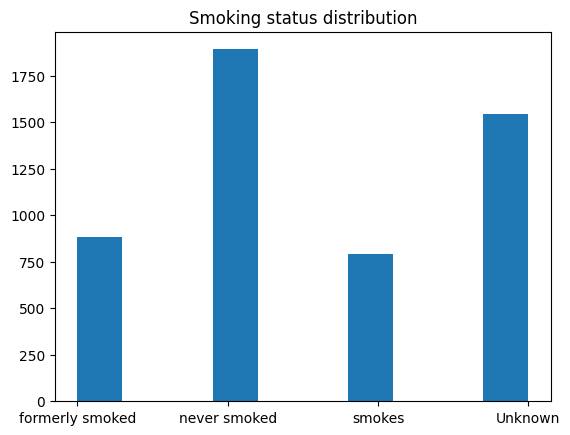

In [ ]:
plt.hist(df['smoking_status'])
plt.title("Smoking status distribution")

Among the patients whose smoking status is known, the majority have never smoked.

## **Numerical Columns:**

Median : 91.88499999999999
Mean : 106.1476771037182


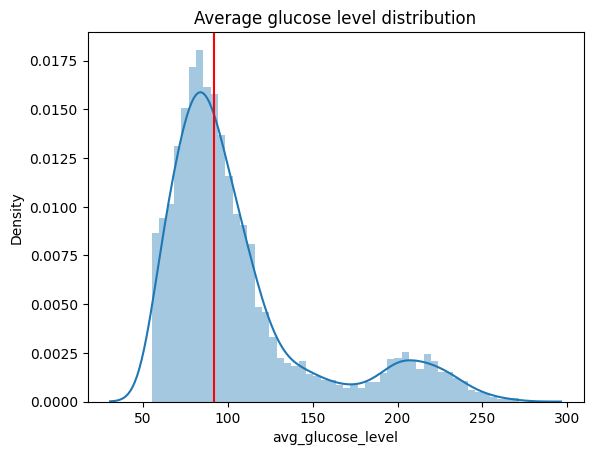

In [ ]:
sns.distplot(df['avg_glucose_level']).set(title='Average glucose level distribution')
plt.axvline(x=df.avg_glucose_level.median(),color='red')
print("Median :",df.avg_glucose_level.median())
print("Mean :",df.avg_glucose_level.mean())

*   The average glucose level distribution is skewed right.
*   With a large peak at 80 and a lesser high around 210.



Median : 28.1


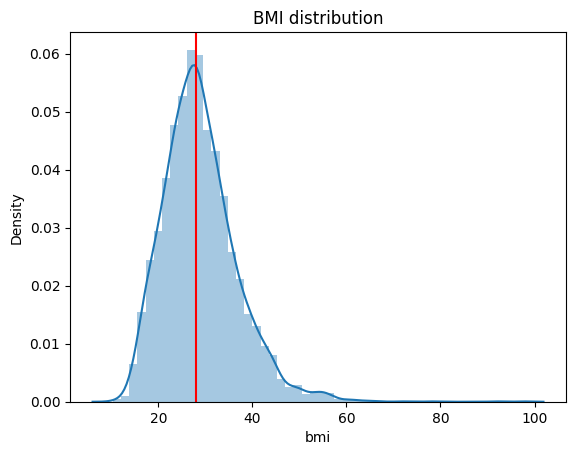

In [ ]:
sns.distplot(df['bmi']).set(title='BMI distribution')
plt.axvline(x=df.bmi.median(),color='red')
print("Median :",df.bmi.median())

*   The BMI distribution is skewed right
*   Majority of the patients have a bmi between 20 and 40
*   The median of the distribution is 28.1





## **Bivariate Analysis**

[Text(0.5, 1.0, 'Stroke distribution by gender')]

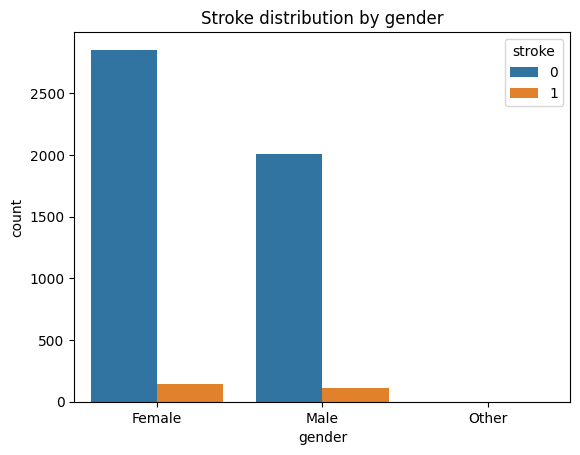

In [ ]:
sns.countplot(data=df, x='gender',hue='stroke').set(title='Stroke distribution by gender')

*  A very tiny proportion of males and girls in the dataset had a stroke.
*  It appears that the number of people who have had a stroke in both genders is roughly equal.



[Text(0.5, 1.0, 'Stroke distribution by Hypertension')]

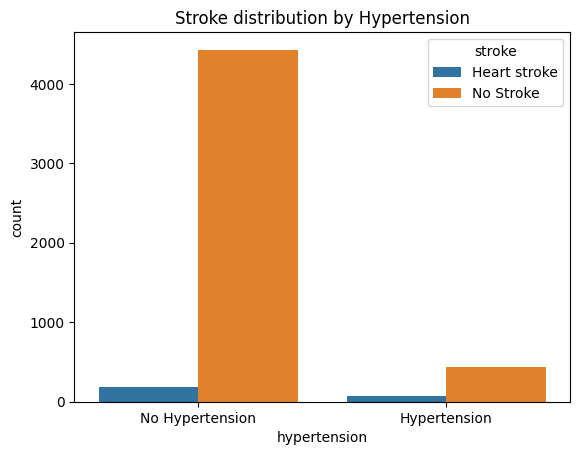

In [ ]:
sns.countplot(data=df_copy, x='hypertension', hue='stroke').set(title='Stroke distribution by Hypertension')

Patients without hypertension had a higher rate of stroke than patients with hypertension.

[Text(0.5, 1.0, 'Stroke distribution by Heart disease')]

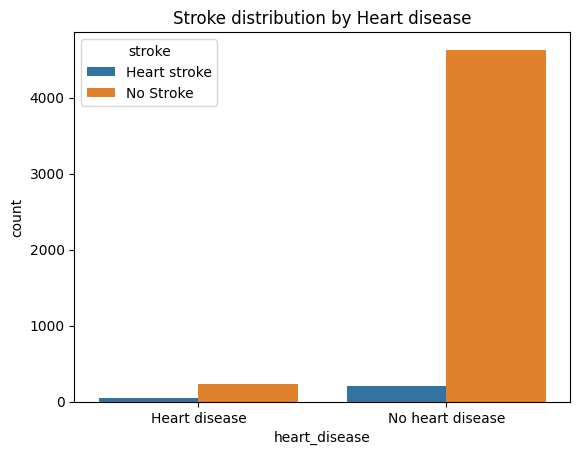

In [ ]:
sns.countplot(data=df_copy, x='heart_disease', hue='stroke').set(title='Stroke distribution by Heart disease')

There were more people who subsequently had a stroke but had no heart problems.

[Text(0.5, 1.0, 'Stroke distribution by marriage status')]

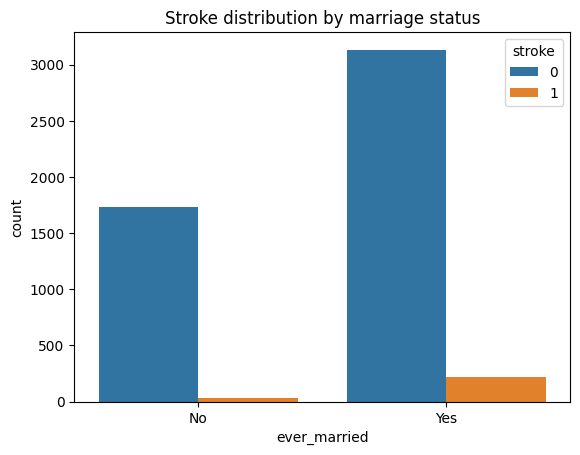

In [ ]:
sns.countplot(data=df, x='ever_married', hue='stroke').set(title='Stroke distribution by marriage status')

A greater frequency of married patients had strokes than unmarried patients.

[Text(0.5, 1.0, 'Stroke distribution by work type')]

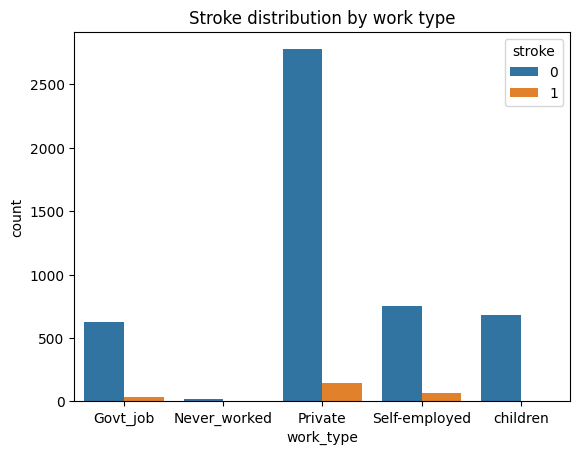

In [ ]:
sns.countplot(data=df, x='work_type', hue='stroke').set(title='Stroke distribution by work type')

*   Most people who suffered a stroke worked for private enterprises.




[Text(0.5, 1.0, 'Stroke distribution by Residence type')]

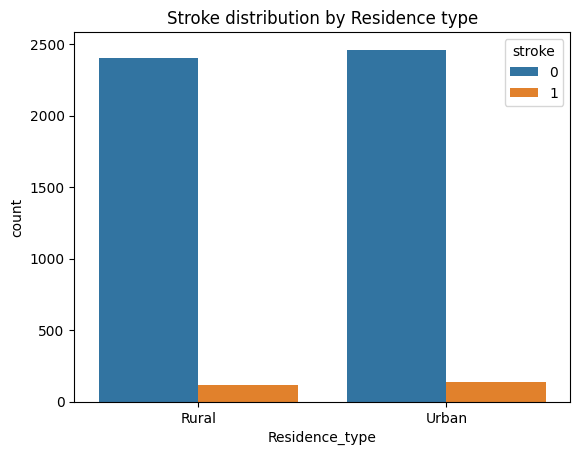

In [ ]:
sns.countplot(data=df, x='Residence_type', hue='stroke').set(title='Stroke distribution by Residence type')

Almost similar amount of patients from both rural and urban areas had experienced stroke.

[Text(0.5, 1.0, 'Stroke distribution by smoking status')]

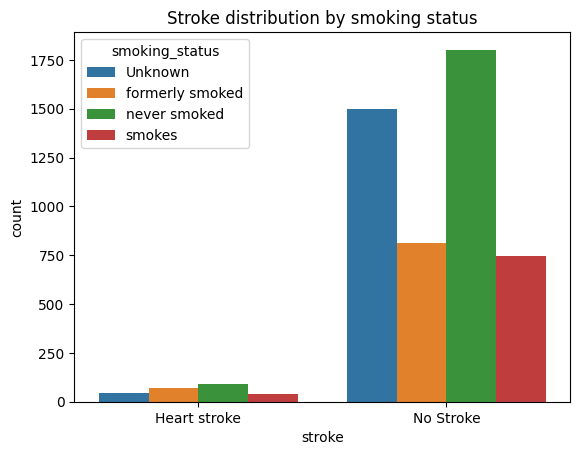

In [ ]:
sns.countplot(data=df_copy, x='stroke', hue='smoking_status').set(title='Stroke distribution by smoking status')

Smoking has a very infrequent effect on the risk of having a heart attack.

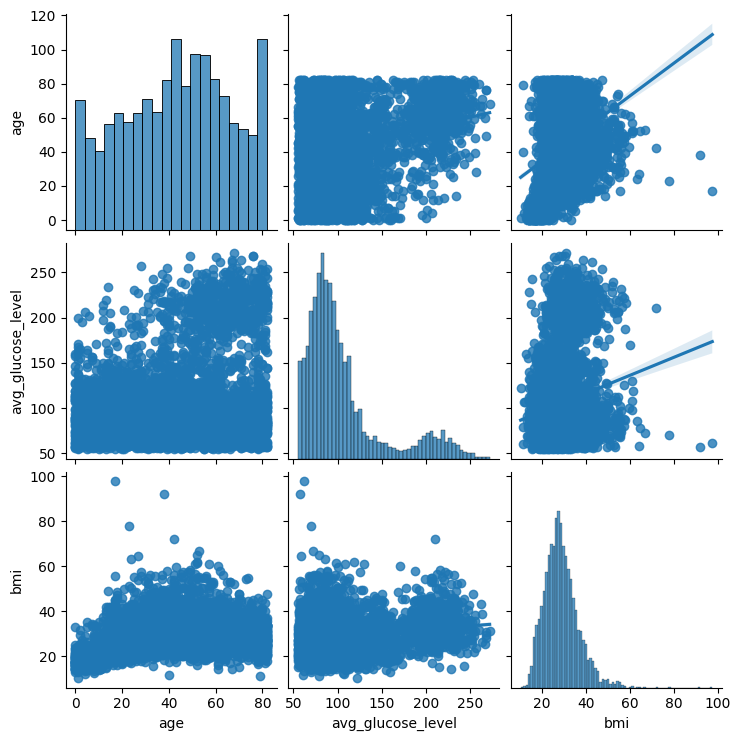

In [ ]:
sns.pairplot(df, vars=['age','avg_glucose_level','bmi'],kind='reg')

This pairplot clearly depicts positive association between bmi and age, bmi and average glucose level.

# **Correlation Analysis**

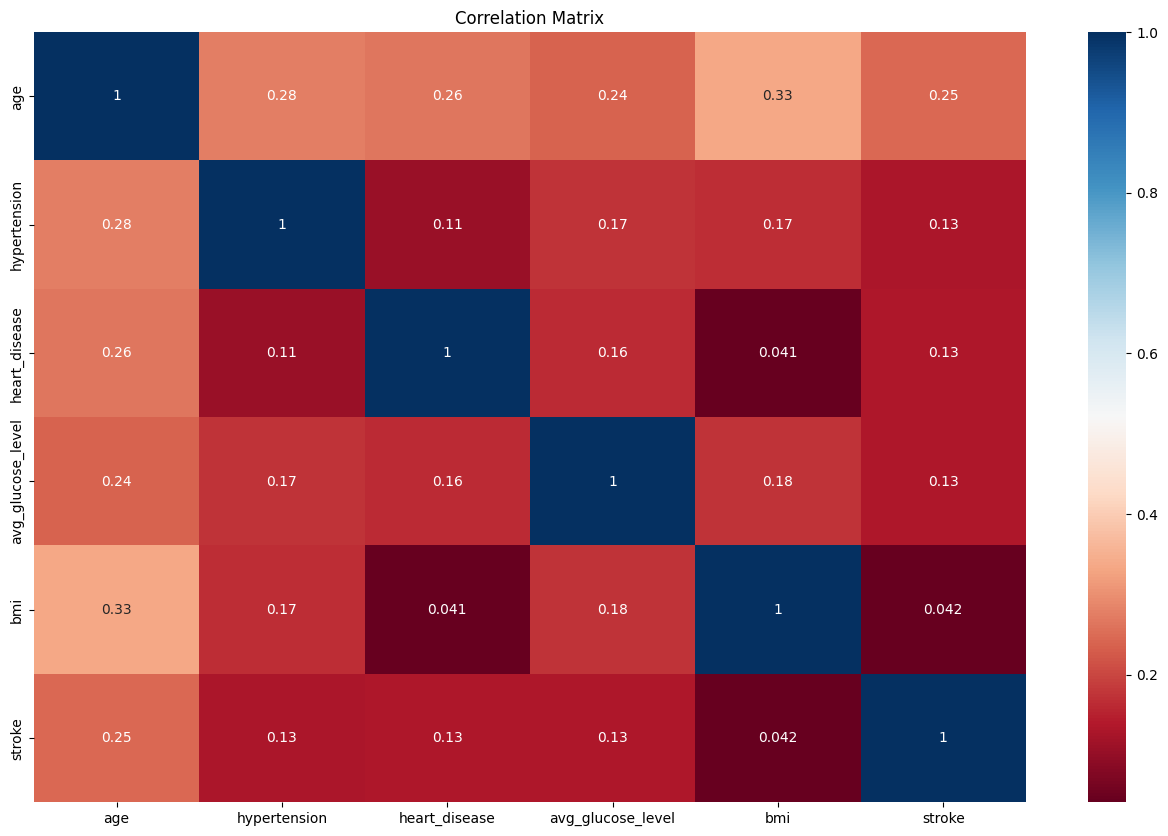

In [ ]:
#getting correlation matrix
plt.figure(figsize=[16,10],dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title("Correlation Matrix")
plt.show()

*   Age shows the strongest correaltion with dependent feature stroke.
*   BMI is weakly correlated with dependent feature stroke.
*   Age positively correlates with hypertension, heart disease, average glucose level. So, with an increase in age they tends to increase.





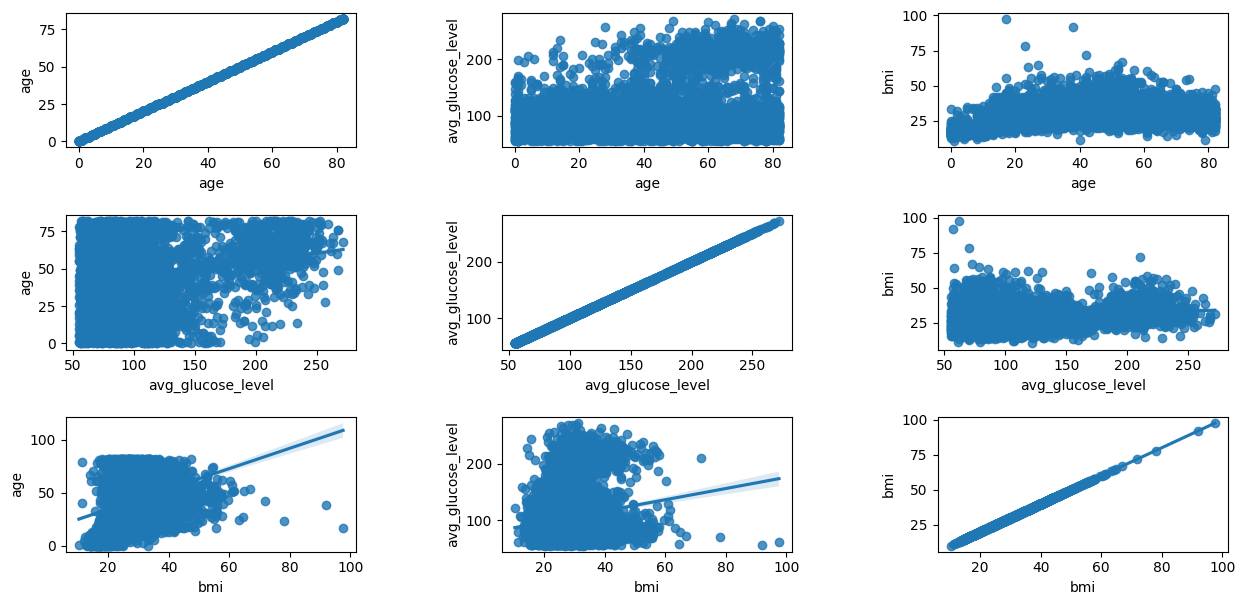

In [ ]:
plt.figure(1, figsize=(15,7))
n=0
for x in ['age','avg_glucose_level','bmi']:
  for y in ['age','avg_glucose_level','bmi']:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.regplot(x=x,y=y,data=df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split())>1 else y)

plt.show()

*   Higher BMI results in higher average glucose level
*   With the increasing age, bmi is seen to increase



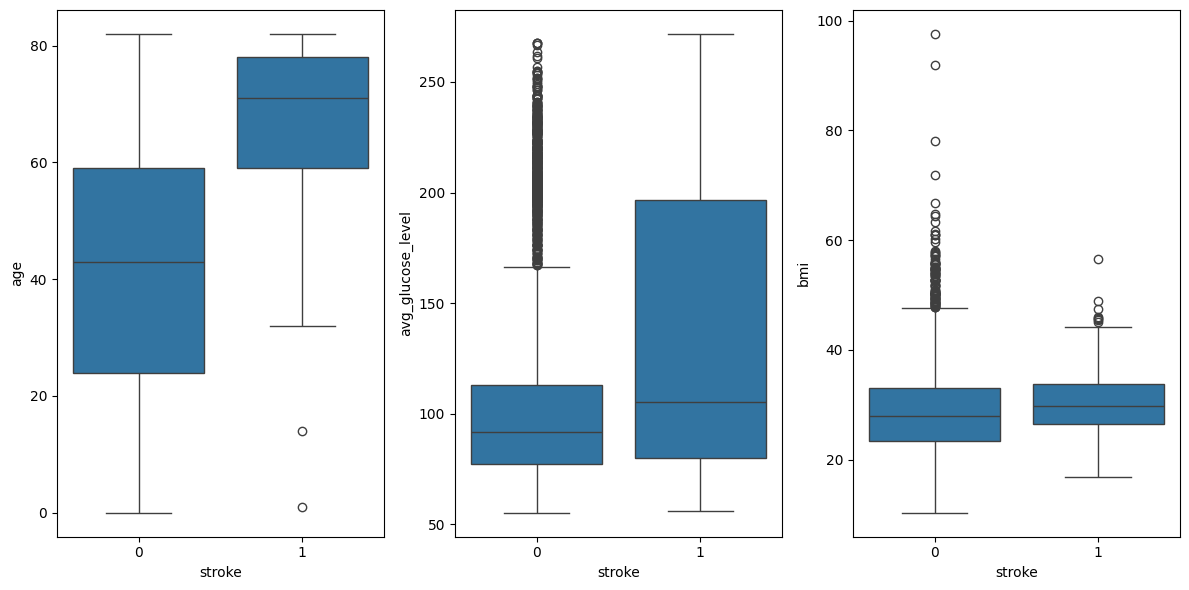

In [ ]:
col_list=['age','avg_glucose_level','bmi']
fix,ax=plt.subplots(1,3,figsize=[12,6])
for i,col in enumerate(col_list):
  sns.boxplot(data=df, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

*   Most patients who have had a stroke are over the age of 60.
*   Outliers in the plot indicate that the younger age group also had strokes.
*   List item
*   List item





# **Preprocessing the data**

In [ ]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

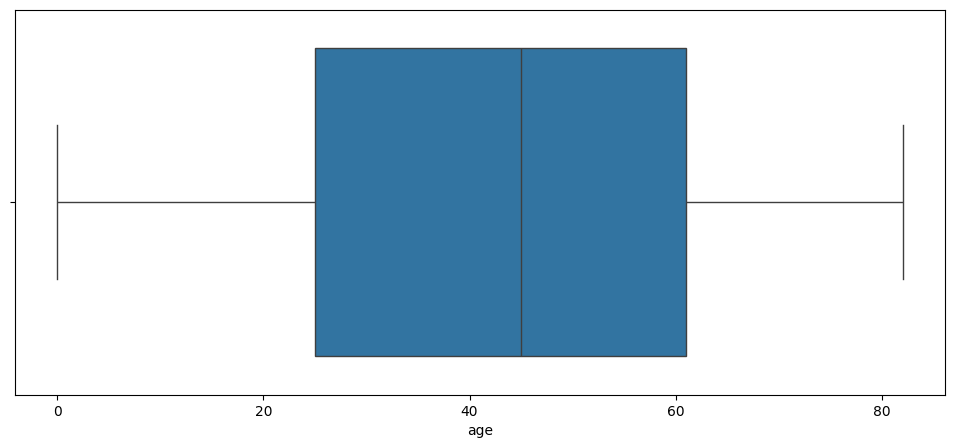

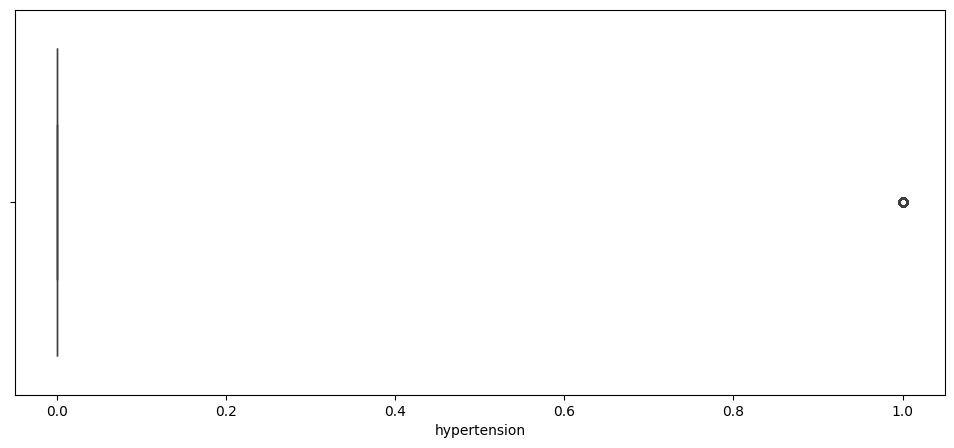

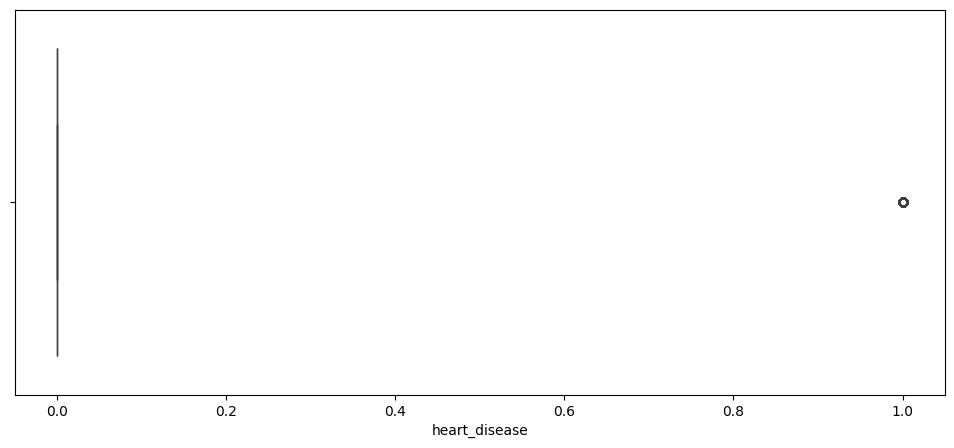

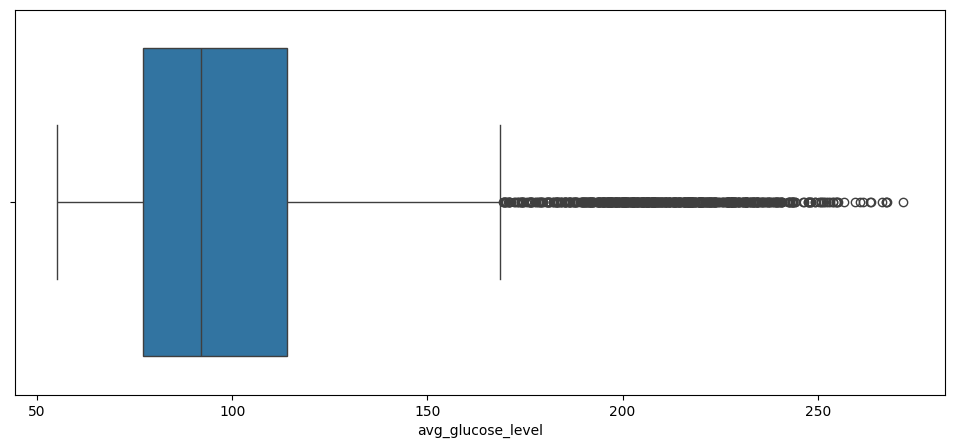

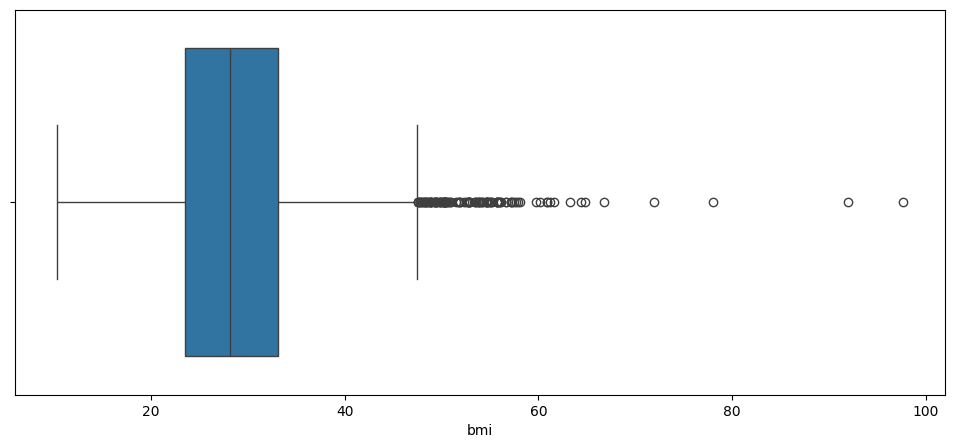

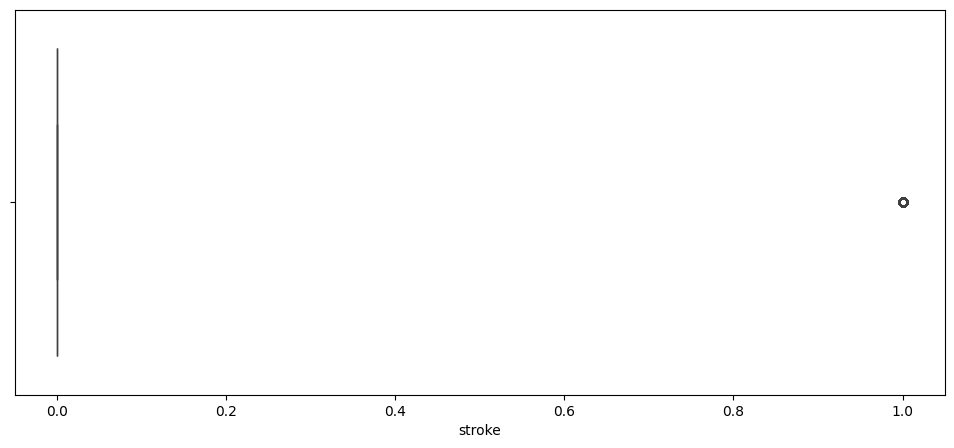

In [ ]:
numerical_list= df.select_dtypes([np.number]).columns
for i in range (len(numerical_list)):
  plt.figure(figsize=[12,5])
  sns.boxplot(x=df[numerical_list[i]])

In [ ]:
outliers_list= ['avg_glucose_level','bmi']

In [ ]:
df1 = df.copy()

def detect_outliers(col):
    print("Mean value:", df1[col].mean())
    print("Standard deviation:", df1[col].std())
    print("Minimum value:", df1[col].min())
    print("Maximum value:", df1[col].max())
    print("Shape:", df1.shape)

    # Finding the boundary values
    upper_bound = df1[col].mean() + 3 * df1[col].std()
    lower_bound = df1[col].mean() - 3 * df1[col].std()
    print("Highest allowed:", upper_bound)
    print("Lowest allowed:", lower_bound)

    # Finding outliers with the help of z score
    df1[col] = np.where(df1[col] > upper_bound, upper_bound,
                        np.where(df1[col] < lower_bound, lower_bound, df1[col]))

    return df1[(df1[col] > upper_bound) | (df1[col] < lower_bound)]

In [ ]:
detect_outliers('avg_glucose_level')

Mean value: 106.1476771037182
Standard deviation: 45.28356015058198
Minimum value: 55.12
Maximum value: 271.74
Shape: (5110, 11)
Highest allowed: 241.9983575554641
Lowest allowed: -29.70300334802772


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


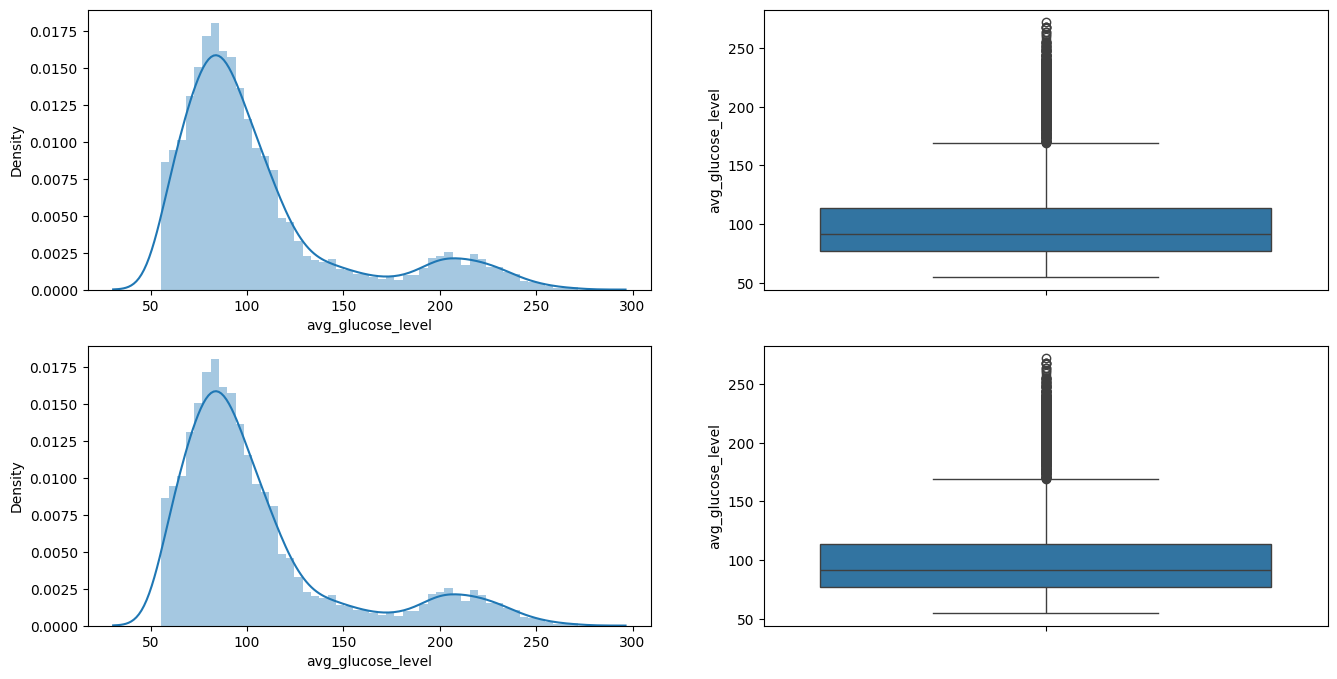

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['avg_glucose_level'])

plt.subplot(2,2,2)
sns.boxplot(df['avg_glucose_level'])

plt.subplot(2,2,3)
sns.distplot(df['avg_glucose_level'])

plt.subplot(2,2,4)
sns.boxplot(df['avg_glucose_level'])

plt.show()

In [ ]:
import plotly.figure_factory as ff

#handling missing values
df1['bmi'].fillna(df1['bmi'].median(),inplace=True)
bmi=list(df1['bmi'].values)
hist_data=[bmi]
group_labels=['bmi']
colors=['Red']
fig=ff.create_distplot(hist_data,group_labels,show_hist=True,colors=colors)
fig.show()

In [ ]:
print("The shape before removing the BMI outliers :",df1.shape)
df1.drop(df1[df1['bmi'] > 47].index,inplace=True)
print("The shape after removing the BMI outliers :",df1.shape)

The shape before removing the BMI outliers : (5110, 11)
The shape after removing the BMI outliers : (4993, 11)


The outliers of BMI have been removed.

In [ ]:
bmi=list(df1['bmi'].values)
hist_data=[bmi]
group_labels=['bmi']
colors=['Red']
fig=ff.create_distplot(hist_data,group_labels,show_hist=True,colors=colors)
fig.show()

In [ ]:
def plots(df,var,t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.distplot(df[var])
  plt.title('before' + str(t))
  plt.subplot(122)
  sns.distplot(t)
  plt.title('after' + str(t))
  plt.show()

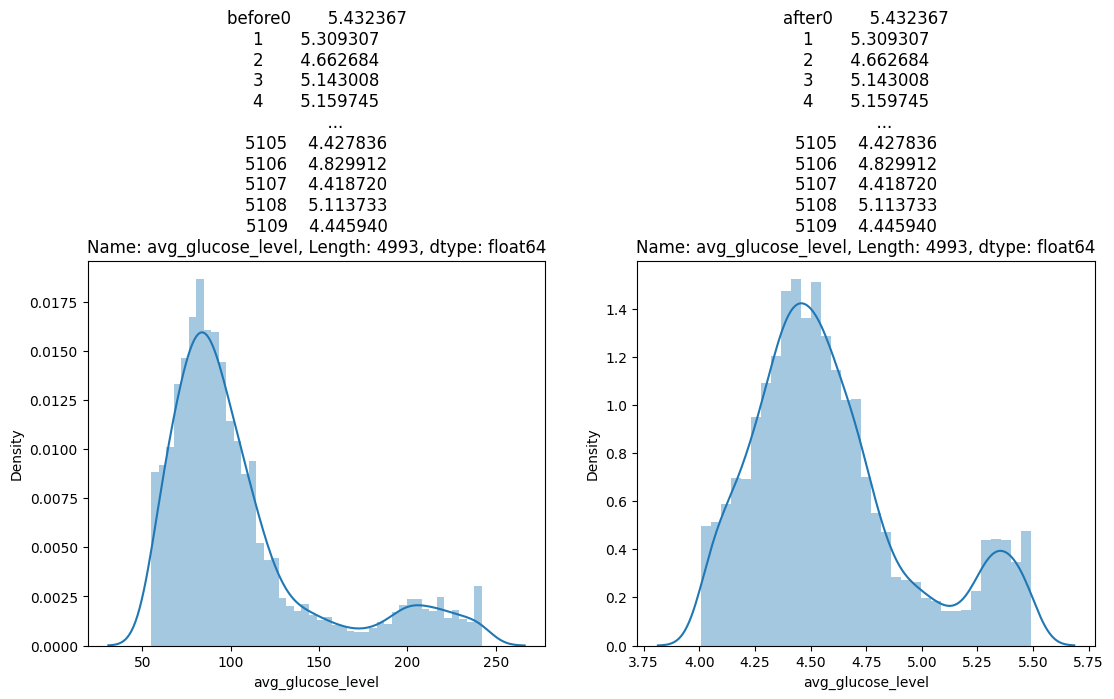

In [ ]:
plots(df1,'avg_glucose_level',np.log(df1['avg_glucose_level']))

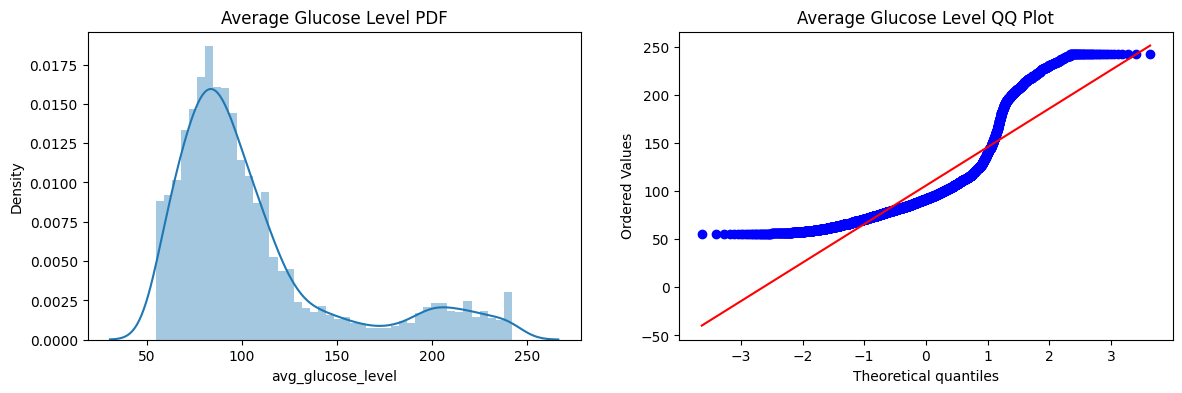

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df1['avg_glucose_level'])
plt.title('Average Glucose Level PDF')

plt.subplot(122)
stats.probplot(df1['avg_glucose_level'],dist='norm',plot=plt)
plt.title("Average Glucose Level QQ Plot")

plt.show()

In [ ]:
def plots(df, var, t):
    plt.figure(figsize=(13, 5))

    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title("Before " + str(t))

    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title("After " + str(t))

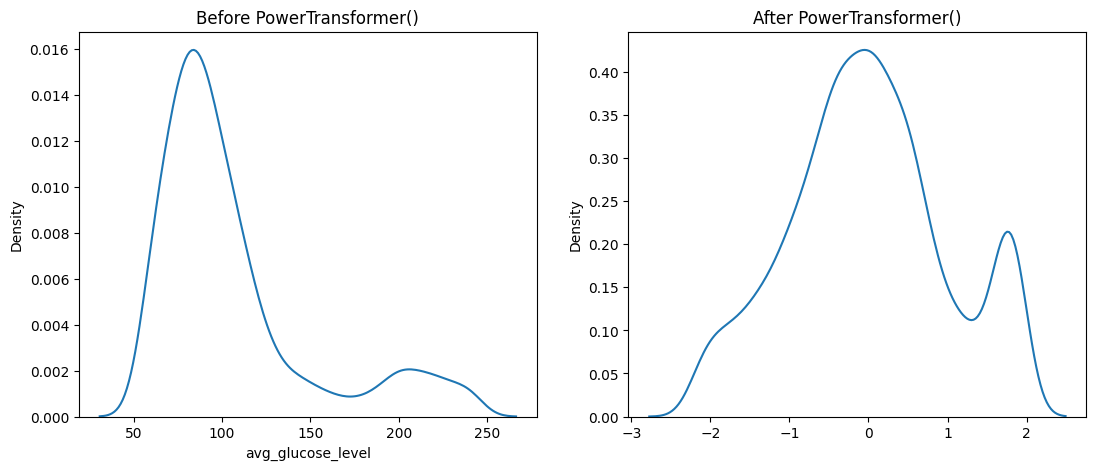

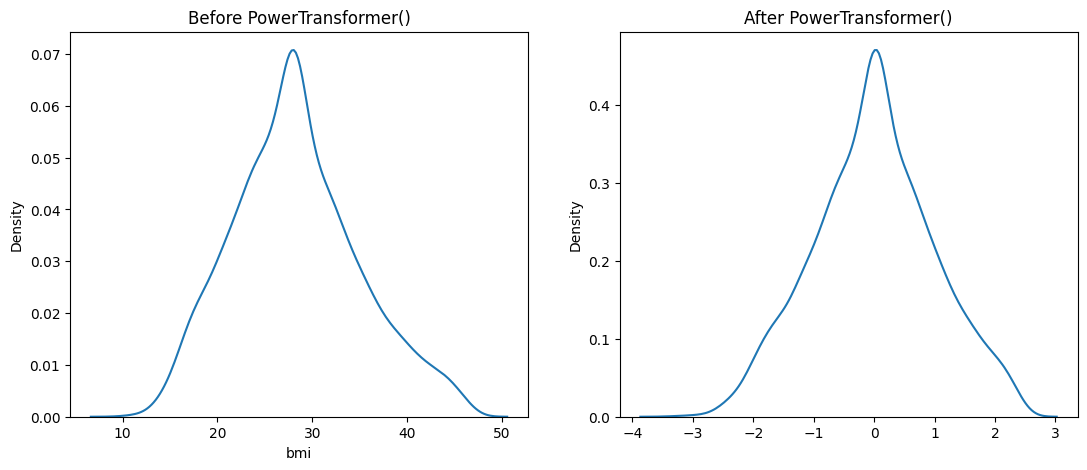

In [ ]:
#Applying Yeo Johnson as our datasets has some 0 values also
for col in ['avg_glucose_level','bmi']:
  plots(df1,col,PowerTransformer())

In [ ]:
df1.to_csv('transformed.csv',index=False)

# **Model Training**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
df3=pd.read_csv('transformed.csv')

In [ ]:
data=df3.copy()
#train-test split
rs=34
x=data.drop('stroke',axis=1)
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=rs)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Categorical variable encoding
nominals = [c for c in x_train if x_train[c].dtypes == 'object']
for c in nominals:
    label_encoder = LabelEncoder()
    # Fit LabelEncoder on combined train and test data to avoid data leakage
    label_encoder.fit(list(x_train[c]) + list(x_test[c]))
    x_train[c] = label_encoder.transform(x_train[c])
    x_test[c] = label_encoder.transform(x_test[c])

In [ ]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3020,1,32,0,0,1,2,0,83.13,32.0,3
1203,1,32,0,0,0,2,0,93.68,31.4,2
3109,0,72,1,0,1,2,0,90.87,22.1,2
2976,0,62,1,0,1,3,1,75.78,28.1,3
4903,1,29,0,0,1,2,1,185.27,31.3,2


Stroke :246 ,No Stroke :4747


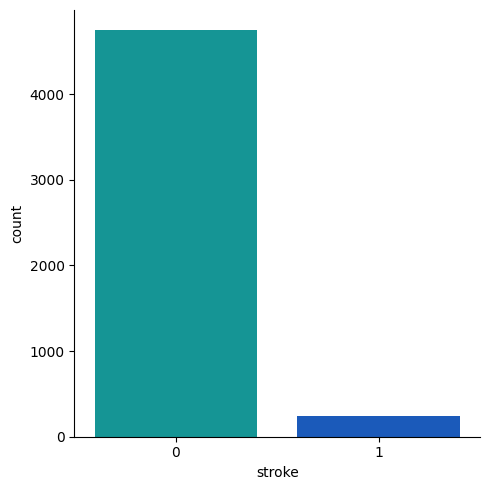

In [ ]:
pos=data[data.stroke==1].shape[0]
neg=data[data.stroke==0].shape[0]
print("Stroke :" +str(pos)+" ,No Stroke :" +str(neg))
sns.catplot(data=data, x='stroke', kind='count',palette='winter_r')

## **Handling imbalanced data**

*   **Undersampling-**  By removing records of majority class
*   **Oversampling-**   By copying records of minority class



In [ ]:
def info_classification(name, y_test, y_pred, y_pred_proba=None):
    if y_pred_proba is not None:
        fpr_log, tpr_log, thresholds_log = metrics.precision_recall_curve(y_test, y_pred_proba)
        auc_log = metrics.roc_auc_score(y_test, y_pred_proba)
    else:
        fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test, y_pred)
        auc_log = metrics.roc_auc_score(y_test, y_pred)  # Corrected

    f1 = metrics.f1_score(y_test, y_pred)
    f2 = metrics.fbeta_score(y_test, y_pred, beta=2)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    plt.plot(fpr_log, tpr_log, color='m', label=name)
    plt.title("ROC " + name)
    plt.legend(loc=4)
    plt.show()

    print("\n" + name + "\n")
    print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
    print("Confusion Matrix: \n" + str(metrics.confusion_matrix(y_test, y_pred)))

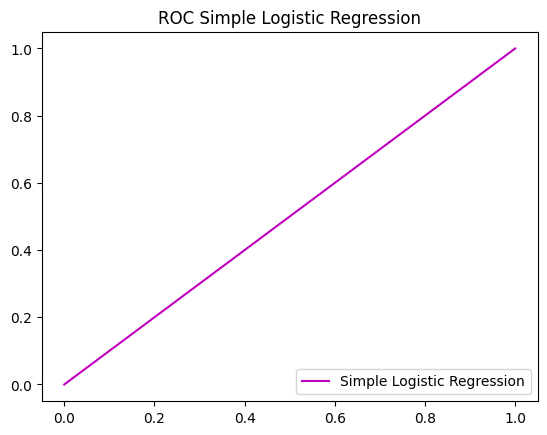


Simple Logistic Regression

Accuracy: 0.9543634907926342
Confusion Matrix: 
[[1192    0]
 [  57    0]]


In [ ]:
lg = LogisticRegression(random_state=rs)
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)

info_classification("Simple Logistic Regression", y_test, y_pred,None)

The model's accuracy is 95%, however it is not representative because the AUC of 0.5 indicates that the model's predictive power is the same as random.

In [ ]:
train= x_train.copy()
train['stroke']=y_train

#Splitting the classes
stroke=train[(train.stroke==1)]
not_stroke=train[(train.stroke==0)]

## **UnderSampling**

We will simply eliminate samples from the training set to ensure an equal number of observations in each class.

In [ ]:
#n_sample parameter = match the minority class, sample() shuffle
not_stroke_downsampled = resample(not_stroke, replace=False, n_samples=len(stroke))
train_downsampled = pd.concat([not_stroke_downsampled,stroke]).sample(frac=1)
train_downsampled.stroke.value_counts()

1    189
0    189
Name: stroke, dtype: int64

In [ ]:
downsampled_y= train_downsampled['stroke']
downsampled_x= train_downsampled.drop('stroke',axis=1)
lg= LogisticRegression(random_state=rs)
lg.fit(downsampled_x,downsampled_y)
y_pred= lg.predict(x_test)

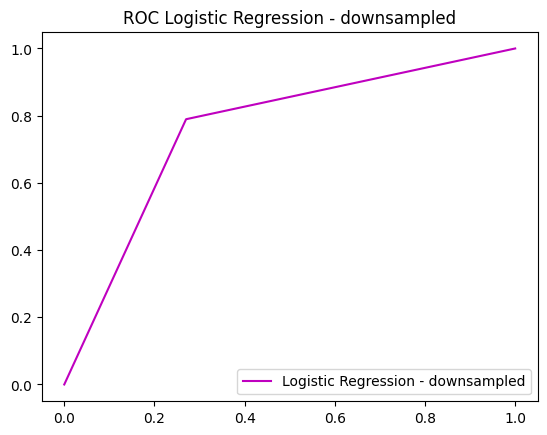


Logistic Regression - downsampled

Accuracy: 0.732586068855084
Confusion Matrix: 
[[870 322]
 [ 12  45]]


In [ ]:
info_classification("Logistic Regression - downsampled",y_test,y_pred)

## **OverSampling**

We will simply replicate samples from the training data to achieve an equal number of observations in each class.

In [ ]:
#n_sample parameter - match the minority class, sample() shuffles
stroke_upsampled = resample(stroke, n_samples=len(not_stroke))
train_upsampled = pd.concat([stroke_upsampled, not_stroke])
train_upsampled.stroke.value_counts()
upsampled_y = train_upsampled['stroke']
upsampled_x = train_upsampled.drop('stroke', axis=1)

Evaluation metrics are critical, particularly when dealing with skewed datasets. The F1 score, which is the harmonic mean of precision and recall, is especially valuable in such situations since it strikes a balance between the two measures.

In [ ]:
#Using Logistic Regression
lr= LogisticRegression()
pipe= Pipeline([('lr',lr)])
pipe.fit(upsampled_x,upsampled_y)
y_pred= pipe.predict(x_test)
score_lr= accuracy_score(y_test,y_pred)*100
print("Training accuracy score ",accuracy_score(y_train,lr.predict(x_train)))
print("Test accuarcy score ",score_lr)

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)} ")

Training accuracy score  0.7553418803418803
Test accuarcy score  75.74059247397919
Confusion Matrix: 
 [[900 292]
 [ 11  46]] 


In [ ]:
# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Create a Pipeline
pipe = Pipeline([('tree', dtc)])

# Train the Pipeline
pipe.fit(upsampled_x, upsampled_y)

# Predict on Test Data
y_pred = pipe.predict(x_test)

# Calculate Accuracy Score
dtc_acc_train = accuracy_score(upsampled_y, pipe.predict(upsampled_x))
dtc_acc_test = accuracy_score(y_test, y_pred)

# Print Training and Test Accuracy Scores
print(f"Training Accuracy of Decision Tree Classifier: {dtc_acc_train}")
print(f"Test Accuracy of Decision Tree Classifier: {dtc_acc_test}")

# Print Confusion Matrix
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Training Accuracy of Decision Tree Classifier: 1.0
Test Accuracy of Decision Tree Classifier: 0.9279423538831065
Confusion Matrix: 
[[1153   39]
 [  51    6]]


In [ ]:
# Initialize Random Forest Classifier
rd_clf = RandomForestClassifier()

# Create a Pipeline
pipe = Pipeline([('rf', rd_clf)])

# Train the Pipeline
pipe.fit(upsampled_x, upsampled_y)

# Predict on Test Data
y_pred = pipe.predict(x_test)

# Calculate Accuracy Score
rd_clf_acc_train = accuracy_score(upsampled_y, pipe.predict(upsampled_x))
rd_clf_acc_test = accuracy_score(y_test, y_pred)

# Print Training and Test Accuracy Scores
print(f"Training Accuracy of Random Forest Classifier: {rd_clf_acc_train*100:.2f}%")
print(f"Test Accuracy of Random Forest Classifier: {rd_clf_acc_test*100:.2f}%")

Training Accuracy of Random Forest Classifier: 100.00%
Test Accuracy of Random Forest Classifier: 94.64%


In [ ]:
# Initialize Random Forest Classifier
rd_clf = RandomForestClassifier()

# Create a Pipeline
pipe = Pipeline([('rf', rd_clf)])

# Train the Pipeline
pipe.fit(upsampled_x, upsampled_y)

# Predict on Test Data
y_pred = pipe.predict(x_test)

# Calculate Accuracy Score
rd_clf_acc_train = accuracy_score(upsampled_y, pipe.predict(upsampled_x))
rd_clf_acc_test = accuracy_score(y_test, y_pred)

# Print Training and Test Accuracy Scores
print(f"Training Accuracy of Random Forest Classifier: {rd_clf_acc_train*100:.2f}%")
print(f"Test Accuracy of Random Forest Classifier: {rd_clf_acc_test*100:.2f}%")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training Accuracy of Random Forest Classifier: 100.00%
Test Accuracy of Random Forest Classifier: 94.56%
Confusion Matrix:
[[1178   14]
 [  54    3]]


In [ ]:
# Initialize AdaBoost Classifier with Decision Tree as base estimator
ada = AdaBoostClassifier(base_estimator=dtc)

# Create a Pipeline
pipe = Pipeline([('ada_boost', ada)])

# Train the Pipeline
pipe.fit(upsampled_x, upsampled_y)

# Predict on Test Data
y_pred = pipe.predict(x_test)

# Calculate Accuracy Score
ada_acc = accuracy_score(y_test, y_pred)

# Print Accuracy Score
print(f"Training Accuracy of AdaBoost Classifier: {pipe.score(upsampled_x, upsampled_y)*100:.2f}%")
print(f"Test Accuracy of AdaBoost Classifier: {ada_acc*100:.2f}%")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy of AdaBoost Classifier: 100.00%
Test Accuracy of AdaBoost Classifier: 92.55%
Confusion Matrix:
[[1149   43]
 [  50    7]]
